In [1]:
import pandas as pd
from pandas import DataFrame
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Load the data into a DataFrame
data = pd.read_csv('churn_raw_data.csv')

In [3]:
#Delete Columns
data.drop(data.iloc[:,2:14], inplace = True, axis=1)

In [4]:
#Delete Columns
data.drop(data.iloc[:,4:8], inplace = True, axis=1)

In [5]:
#Delete Columns
data.drop(data.iloc[:,6:16], inplace = True, axis=1)

In [6]:
#Delete Columns
data.drop(data.columns[[4,6,8,11,12,14]], inplace = True, axis=1)

In [7]:
#Delete Columns
data.drop(data.iloc[:,12:19], inplace = True, axis=1)

In [8]:
#Delete Columns
data.drop(data.columns[[12]], inplace = True, axis=1)

In [9]:
#Assess data types and null values
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   CaseOrder          10000 non-null  int64  
 2   Children           7505 non-null   float64
 3   Age                7525 non-null   float64
 4   Churn              10000 non-null  object 
 5   OnlineSecurity     10000 non-null  object 
 6   DeviceProtection   10000 non-null  object 
 7   TechSupport        9009 non-null   object 
 8   PaperlessBilling   10000 non-null  object 
 9   Tenure             9069 non-null   float64
 10  MonthlyCharge      10000 non-null  float64
 11  Bandwidth_GB_Year  8979 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 937.6+ KB


In [10]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0              0
CaseOrder               0
Children             2495
Age                  2475
Churn                   0
OnlineSecurity          0
DeviceProtection        0
TechSupport           991
PaperlessBilling        0
Tenure                931
MonthlyCharge           0
Bandwidth_GB_Year    1021
dtype: int64


In [11]:
#Check for duplicates
duplicate_values =data.duplicated()
print(duplicate_values.value_counts())

False    10000
Name: count, dtype: int64


In [12]:
#impute Missing Data
data['Tenure'].fillna(data['Tenure'].median(), inplace = True)
data['Bandwidth_GB_Year'].fillna(data['Bandwidth_GB_Year'].median(), inplace = True)
data['TechSupport']= data['TechSupport'].fillna(data['TechSupport'].mode()[0])
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Children'].fillna(data['Children'].median(), inplace = True)

In [13]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0           0
CaseOrder            0
Children             0
Age                  0
Churn                0
OnlineSecurity       0
DeviceProtection     0
TechSupport          0
PaperlessBilling     0
Tenure               0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64


In [14]:
#Categorical Columns to Numeric
categorical_columns = ['Churn','OnlineSecurity','DeviceProtection', 'TechSupport', 'PaperlessBilling']
for column in categorical_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

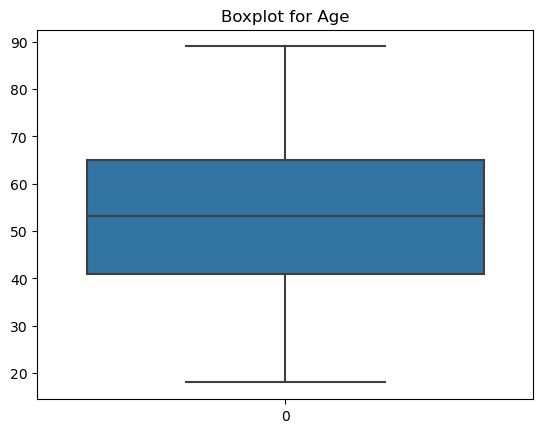

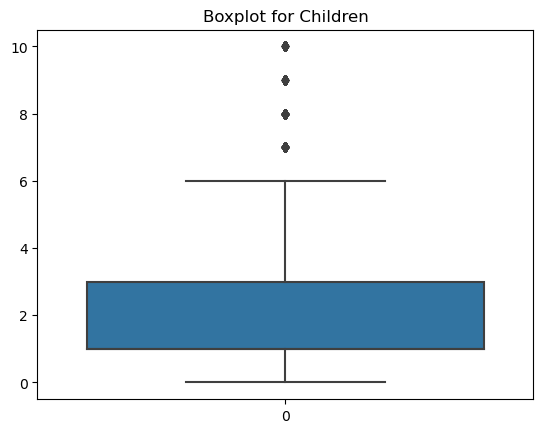

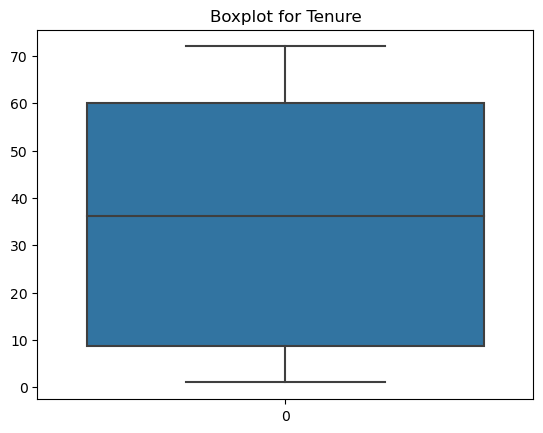

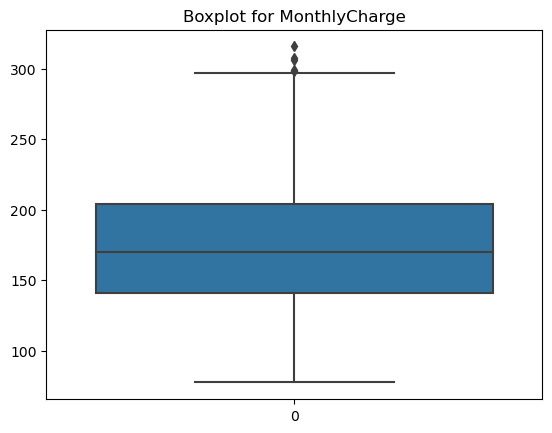

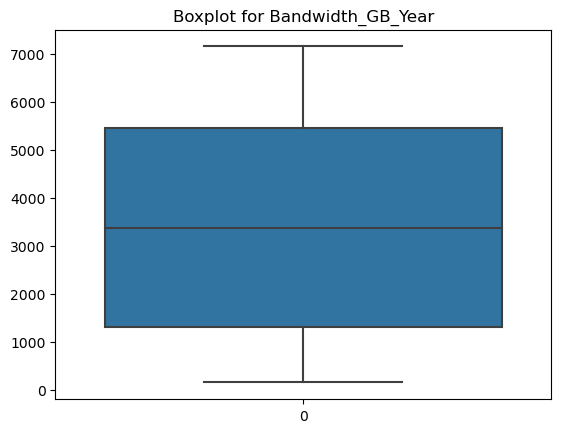

Outliers in Age: 0
Outliers in Children: 451
Outliers in Tenure: 0
Outliers in MonthlyCharge: 5
Outliers in Bandwidth_GB_Year: 0


In [15]:
#Determine Outliers
columns_to_plot = ['Age', 'Children','Tenure','MonthlyCharge', 'Bandwidth_GB_Year']

#Dictionary Outliers
outlier_counts={}

#Create Separate boxplots
for column in columns_to_plot:
    seaborn.boxplot(data=data[column])
    plt.title(f"Boxplot for {column}")
    
    # Calculate the IQR for the current column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers based on the IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count and store the number of outliers
    num_outliers = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()
    outlier_counts[column] = num_outliers
    
    plt.show()
    # Print 
for column, count in outlier_counts.items():
    print(f"Outliers in {column}: {count}")

In [16]:
#Remove outliers
def remove_outliers(data, column_to_clean):
    Q1 = data[column_to_clean].quantile(0.25)
    Q3 = data[column_to_clean].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column_to_clean] >= lower_bound) & (data[column_to_clean] <= upper_bound)]

    print(f"Column: {column_to_clean}")
    print(f"Original Data Shape: {data.shape}")
    print(f"Data without outliers Shape: {data_no_outliers.shape}\n")

    return data_no_outliers
data = remove_outliers(data, 'MonthlyCharge')
data = remove_outliers(data, 'Children')

Column: MonthlyCharge
Original Data Shape: (10000, 12)
Data without outliers Shape: (9995, 12)

Column: Children
Original Data Shape: (9995, 12)
Data without outliers Shape: (9544, 12)



PCA Data Mean:
PC1    2.374207e-15
PC2   -2.869782e-17
PC3   -1.414767e-16
PC4    4.177296e-17
dtype: float64

PCA Data Standard Deviation:
PC1    1.376794
PC2    1.006335
PC3    0.998370
PC4    0.995685
dtype: float64


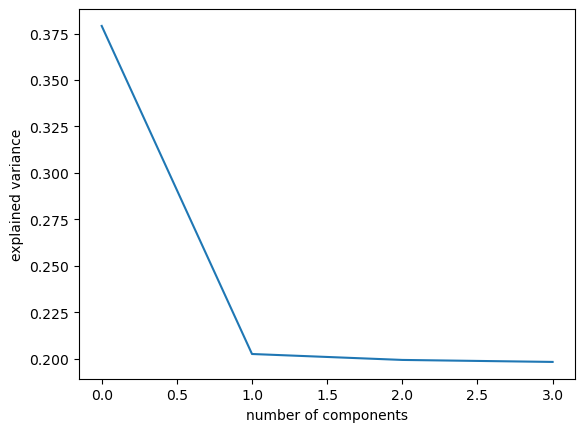

In [19]:
#PCA
data.head()
selected_columns=['Age', 'Children','Tenure','MonthlyCharge', 'Bandwidth_GB_Year']
#'Churn','OnlineSecurity', 'DeviceProtection','TechSupport', 'PaperlessBilling',

data= data[selected_columns]
data_normalized=(data-data.mean())/data.std()

n_components= 4

pca = PCA(n_components=n_components)
pca.fit(data_normalized)
data_pca = pd.DataFrame(pca.transform(data_normalized),
                        columns=['PC1','PC2','PC3','PC4'])
#,'PC4','PC5','PC6','PC7','PC8'
pca_mean = data_pca.mean()
pca_std = data_pca.std()

print("PCA Data Mean:")
print(pca_mean)

print("\nPCA Data Standard Deviation:")
print(pca_std)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [20]:
column_names = ['PC1', 'PC2', 'PC3', 'PC4'] 
#', 'PC6', 'PC7', 'PC8'
loadings = pd.DataFrame(pca.components_.T, columns=column_names, index=data.columns)

print("Feature Loadings on Principal Components:")
print(loadings)

Feature Loadings on Principal Components:
                        PC1       PC2       PC3       PC4
Age               -0.007316  0.637233  0.225248 -0.736702
Children          -0.010911  0.601238  0.452742  0.658087
Tenure             0.705591 -0.022568  0.058927 -0.027974
MonthlyCharge      0.044655  0.481532 -0.860692  0.151571
Bandwidth_GB_Year  0.707089  0.007981  0.004869  0.020875


[0.37911235 0.58165428 0.78100297 0.97928088]


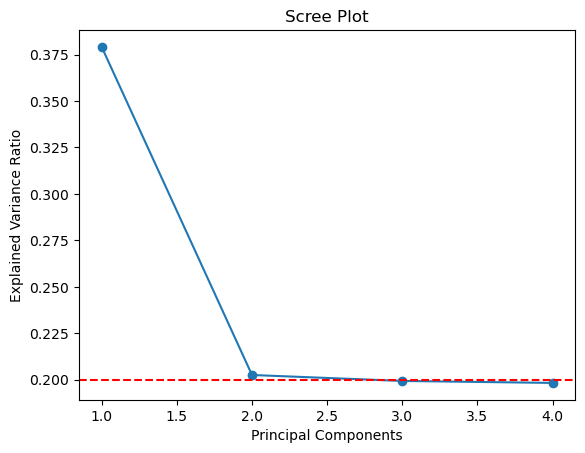

In [21]:
#ScreePlot
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance_ratio_cumsum)
explained_var = pca.explained_variance_ratio_
plt.plot(range(1, n_components + 1), explained_var, marker='o')
plt.axhline(y=0.20, color='r', linestyle='--', label='Threshold')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
#Save Data to clean dataset
cleaned_data.to_csv("churn_cleaned_dataset.csv", index=False)


In [ ]:
#Check Cleaniless

In [23]:
summary_stats = data.describe()
print(summary_stats)

               Age     Children       Tenure  MonthlyCharge  Bandwidth_GB_Year
count  9544.000000  9544.000000  9544.000000    9544.000000        9544.000000
mean     53.405188     1.523575    34.675011     174.063854        3393.329262
std      17.970723     1.359922    25.181173      43.166794        2070.059686
min      18.000000     0.000000     1.005104      77.505230         155.506715
25%      41.000000     1.000000     8.695113     141.149012        1301.378301
50%      53.275748     1.000000    36.196030     170.071105        3382.424000
75%      66.000000     2.000000    60.125025     203.595775        5456.818750
max      89.000000     6.000000    71.999280     297.315800        7138.309000


In [31]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                  0
Children             0
Tenure               0
MonthlyCharge        0
Bandwidth_GB_Year    0
dtype: int64


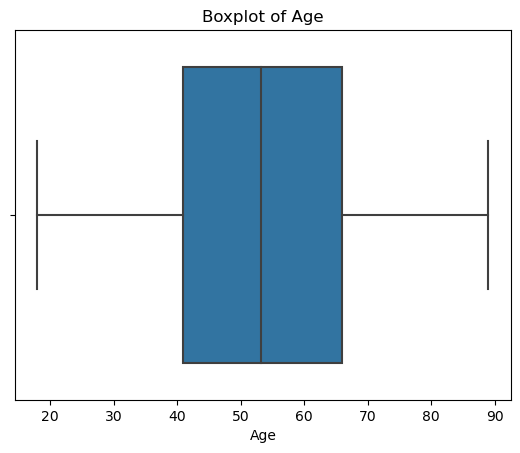

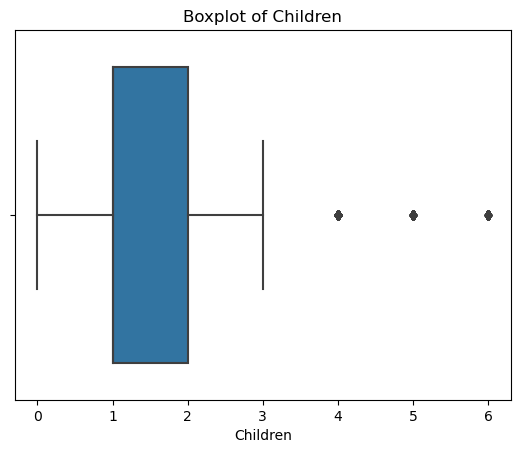

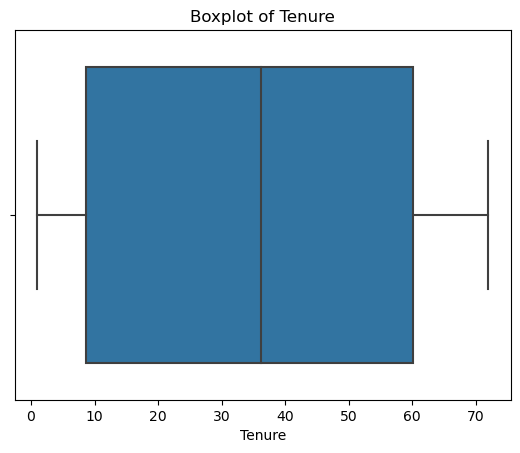

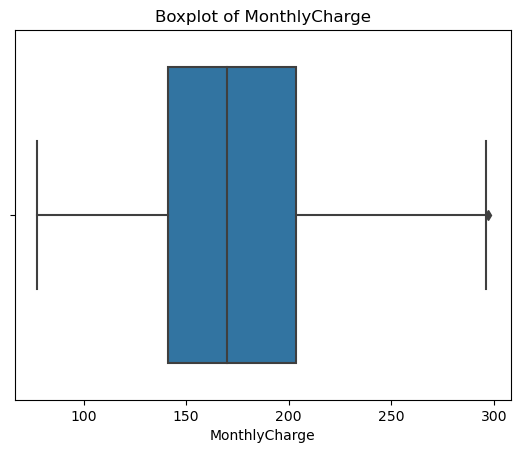

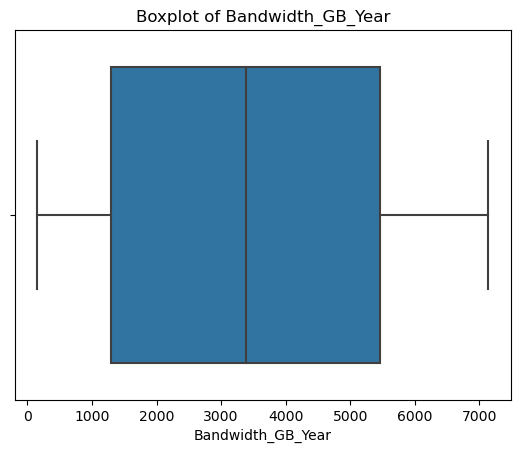

In [25]:
for column in data.columns:
    seaborn.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()